Text(0.5,0.98,'FX/LP benchmark')

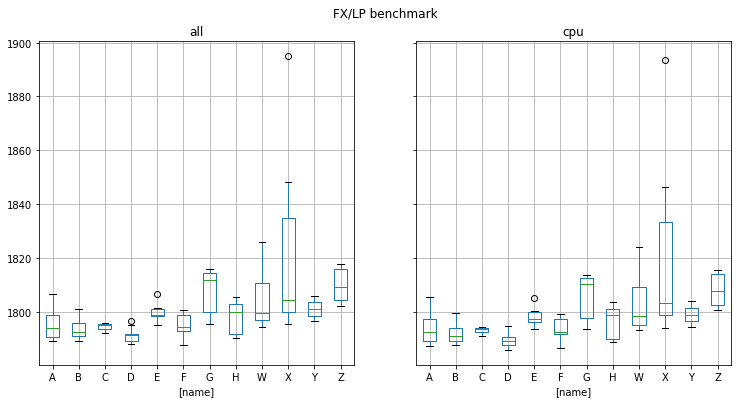

In [7]:
import glob
import pandas as pd
import matplotlib.pyplot as plt

filenames = glob.glob('./data/?0.csv')
filenames.sort()
dfs = map(lambda f: pd.read_csv(f), filenames)
df0 = pd.concat(dfs, join="inner")
df0.to_csv('data/stat0.csv', index=False)

def process(df, val_col):
    dfr = df.loc[:,['name', val_col]].sort_values(by=['name', val_col])
    dfr = dfr.groupby('name', as_index=False).apply(lambda grp: grp.iloc[2:-2])
    dfr.to_csv('data/{}-percentiled.csv'.format(val_col), index=False)
    return dfr
    
dfall = process(df0, 'all')
dfcpu = process(df0, 'cpu')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)
dfall.boxplot(by='name', ax=axes[0])
dfcpu.boxplot(by='name', ax=axes[1])
fig.suptitle('FX/LP benchmark')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt

df0 = pd.read_csv('data/stat0.csv')

def process_agg(df, val_col):
    dfr = df.loc[:,['name', val_col]].groupby('name', as_index=False).apply(lambda grp: grp.iloc[2:-2])
    dfr = dfr.groupby('name').agg([np.min, np.median, np.max])
    dfr = pd.DataFrame(dfr.to_records())
    dfr.columns = ['name', 'min', 'median', 'max']
    dfr.to_csv('data/{}-agg.csv'.format(val_col), index=False)
    return dfr

dfall = process_agg(df0, 'all')
dfcpu = process_agg(df0, 'all')
dfall
#plt.plot(dfall['name'], dfall.drop(columns=['name']))

#fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)
#axes[0].plot(dfall['name'], dfall.drop(columns=['name']))
#axes[1].plot(dfcpu['name'], dfcpu.drop(columns=['name']))
#fig.suptitle('FX/LP min/median/max')

,name,min,median,max
0,A,1786.165,1794.837,1807.391
1,B,1782.901,1792.965,1810.074
2,C,1788.896,1793.613,1796.643
3,D,1787.257,1790.546,1798.328
4,E,1794.174,1798.694,1811.183
5,F,1787.019,1798.416,1806.387
6,G,1793.761,1800.450,1823.919
7,H,1787.317,1800.728,1805.615
8,W,1788.586,1799.355,1836.079
9,X,1792.691,1801.623,1899.431
